# TASK-3

## Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually

### Author- Sunny Kumar Tripathi

## Step 1: Importing necessary python package

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing dataset

In [2]:
# Importing here dataset from csv 

df= pd.read_csv('Iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Data with null values
df.isnull().sum()

#NO null values 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

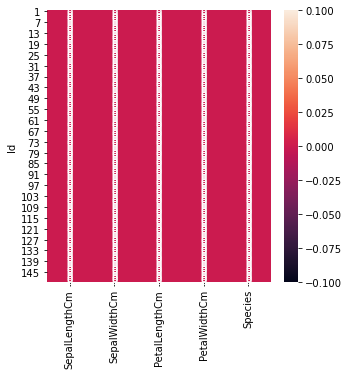

In [4]:
#using heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),annot=True,xticklabels=True,)
plt.show()

In [5]:
# data shape and size and other information
print('Shape of Data is:',df.shape)
print('Size of Data is:',df.size)
print('Dimension of Data is:',df.ndim)
print('Various Insights of Data:\n')
df.info()

Shape of Data is: (150, 5)
Size of Data is: 750
Dimension of Data is: 2
Various Insights of Data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
# Data Columns
print('Columns in Data ----',df.columns)

Columns in Data ---- Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


# Step 3: Plot & Visualization

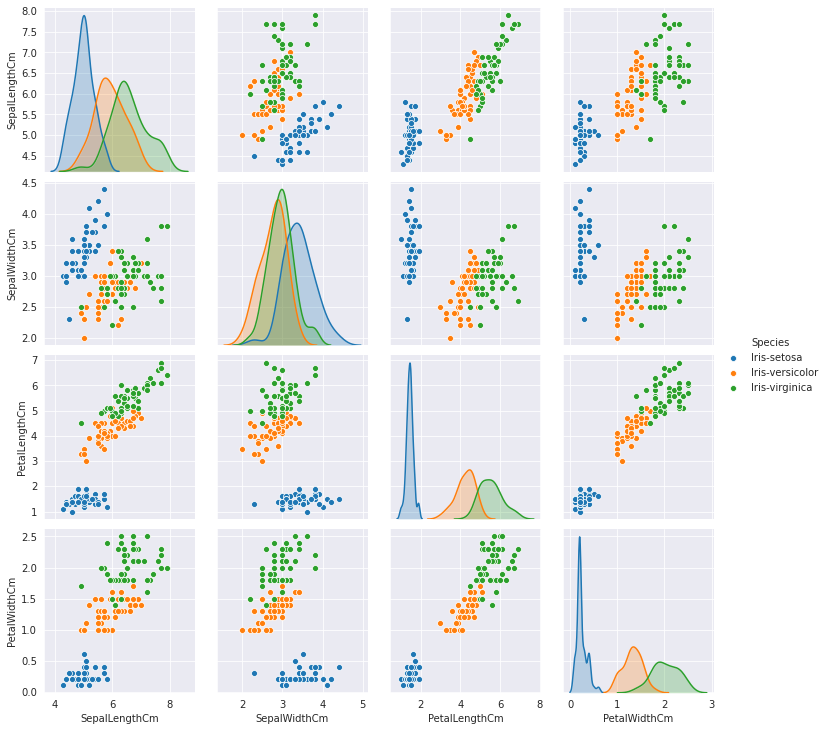

In [7]:
#Using Scatter/pair plot relationship between variables
sns.set_style('darkgrid')
sns.pairplot(df,hue='Species')
plt.show()


In [8]:
X=df.drop(['Species'],axis=1)

## ELBOW METHOD

In [9]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)


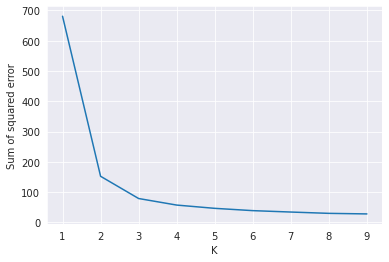

In [10]:
#plot 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

From the above ELBOW Plot , it clear n_Clusters=3, take it.

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [12]:
X['Cluster']=y_predict
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1


In [13]:
X['Cluster'].value_counts()

2    62
1    50
0    38
Name: Cluster, dtype: int64

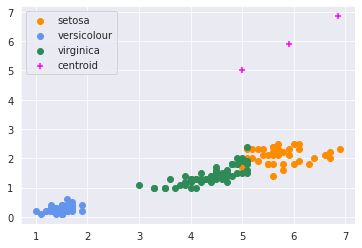

In [14]:
df1 = X[X.Cluster==0]
df2 = X[X.Cluster==1]
df3 = X[X.Cluster==2]

#Considering PetalLength and PetalWidth for Scatter plot

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='darkorange', label='setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='cornflowerblue',label='versicolour')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='seagreen',label='virginica')

plt.scatter(km.cluster_centers_[:,:1],km.cluster_centers_[:,:1],color='magenta',marker='+',label='centroid')
plt.legend()
plt.show()